In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot
warnings.filterwarnings('ignore')


### 1. Reading merged Csv file downloaded from google trends on similar words related to dengue fetched from NEA website

Source for common terms: https://www.moh.gov.sg/diseases-updates/dengue
1. General terms - Dengue cluster, dengue hotspots
2. Disease Definition - Dengue, Dengue Fever, Fever, DHF, haemorrhagic
3. Dengue Symptom -  Rashes, fever, joint pain, nausea, vomit, bleeding, abdominal pain, headache,
4. Dengue Protection - dengue vaccine, Dengvaxia, citronella, eucalyptus, repellent, mosquito net, essential oils, stagnant water, DEET, picaridin, IR3535, wolbachia, insecticide
5. Dengue Treatment - electrolyte replacement, blood transfusion, emergency treatment, mopiko
6. Dengue Vector - Aedes mosquito, mosquito bite, Aedes aegypti

In [2]:
df = pd.read_csv('../datasets/dengue_search_trends/merged_search_trends.csv')
df.head(3)

,Week,abdominal pain: (Singapore),aedes: (Singapore),Aedes aegypti: (Singapore),Aedes mosquito: (Singapore),bleeding: (Singapore),blood transfusion: (Singapore),citronella: (Singapore),DEET: (Singapore),dengue: (Singapore),...,mosquito bite: (Singapore),mosquito net: (Singapore),mosquito repellent: (Singapore),nausea: (Singapore),picaridin: (Singapore),Rashes: (Singapore),repellent: (Singapore),stagnant water: (Singapore),vomit: (Singapore),wolbachia: (Singapore)
0,2018-04-08,34,0,0,0,63,0,0,0,9,...,43,38,47,43,0,60,38,31,31,0
1,2018-04-15,66,59,0,0,54,36,0,24,5,...,30,55,0,55,0,63,17,0,59,0
2,2018-04-22,51,0,0,22,86,0,37,0,8,...,39,0,20,49,34,77,42,0,39,0


### 2. Finding correlation coefficients of the keywords

In [3]:
dataCorr = df.corr(method='pearson').abs()
dataCorr = dataCorr.mask(np.tril(np.ones(dataCorr.shape)).astype(np.bool))
#print (dataCorr)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5]),
 [Text(0.5, 0, 'abdominal pain: (Singapore)'),
  Text(1.5, 0, 'aedes: (Singapore)'),
  Text(2.5, 0, 'Aedes aegypti: (Singapore)'),
  Text(3.5, 0, 'Aedes mosquito: (Singapore)'),
  Text(4.5, 0, 'bleeding: (Singapore)'),
  Text(5.5, 0, 'blood transfusion: (Singapore)'),
  Text(6.5, 0, 'citronella: (Singapore)'),
  Text(7.5, 0, 'DEET: (Singapore)'),
  Text(8.5, 0, 'dengue: (Singapore)'),
  Text(9.5, 0, 'Dengue cluster: (Singapore)'),
  Text(10.5, 0, 'dengue fever: (Singapore)'),
  Text(11.5, 0, 'dengue hotspots: (Singapore)'),
  Text(12.5, 0, 'dengue vaccine: (Singapore)'),
  Text(13.5, 0, 'Dengvaxia: (Singapore)'),
  Text(14.5, 0, 'dhf: (Singapore)'),
  Text(15.5, 0, 'essential oils: (Singapore)'),
  Text(16.5, 0, 'eucalyptus: (Singapore)'),


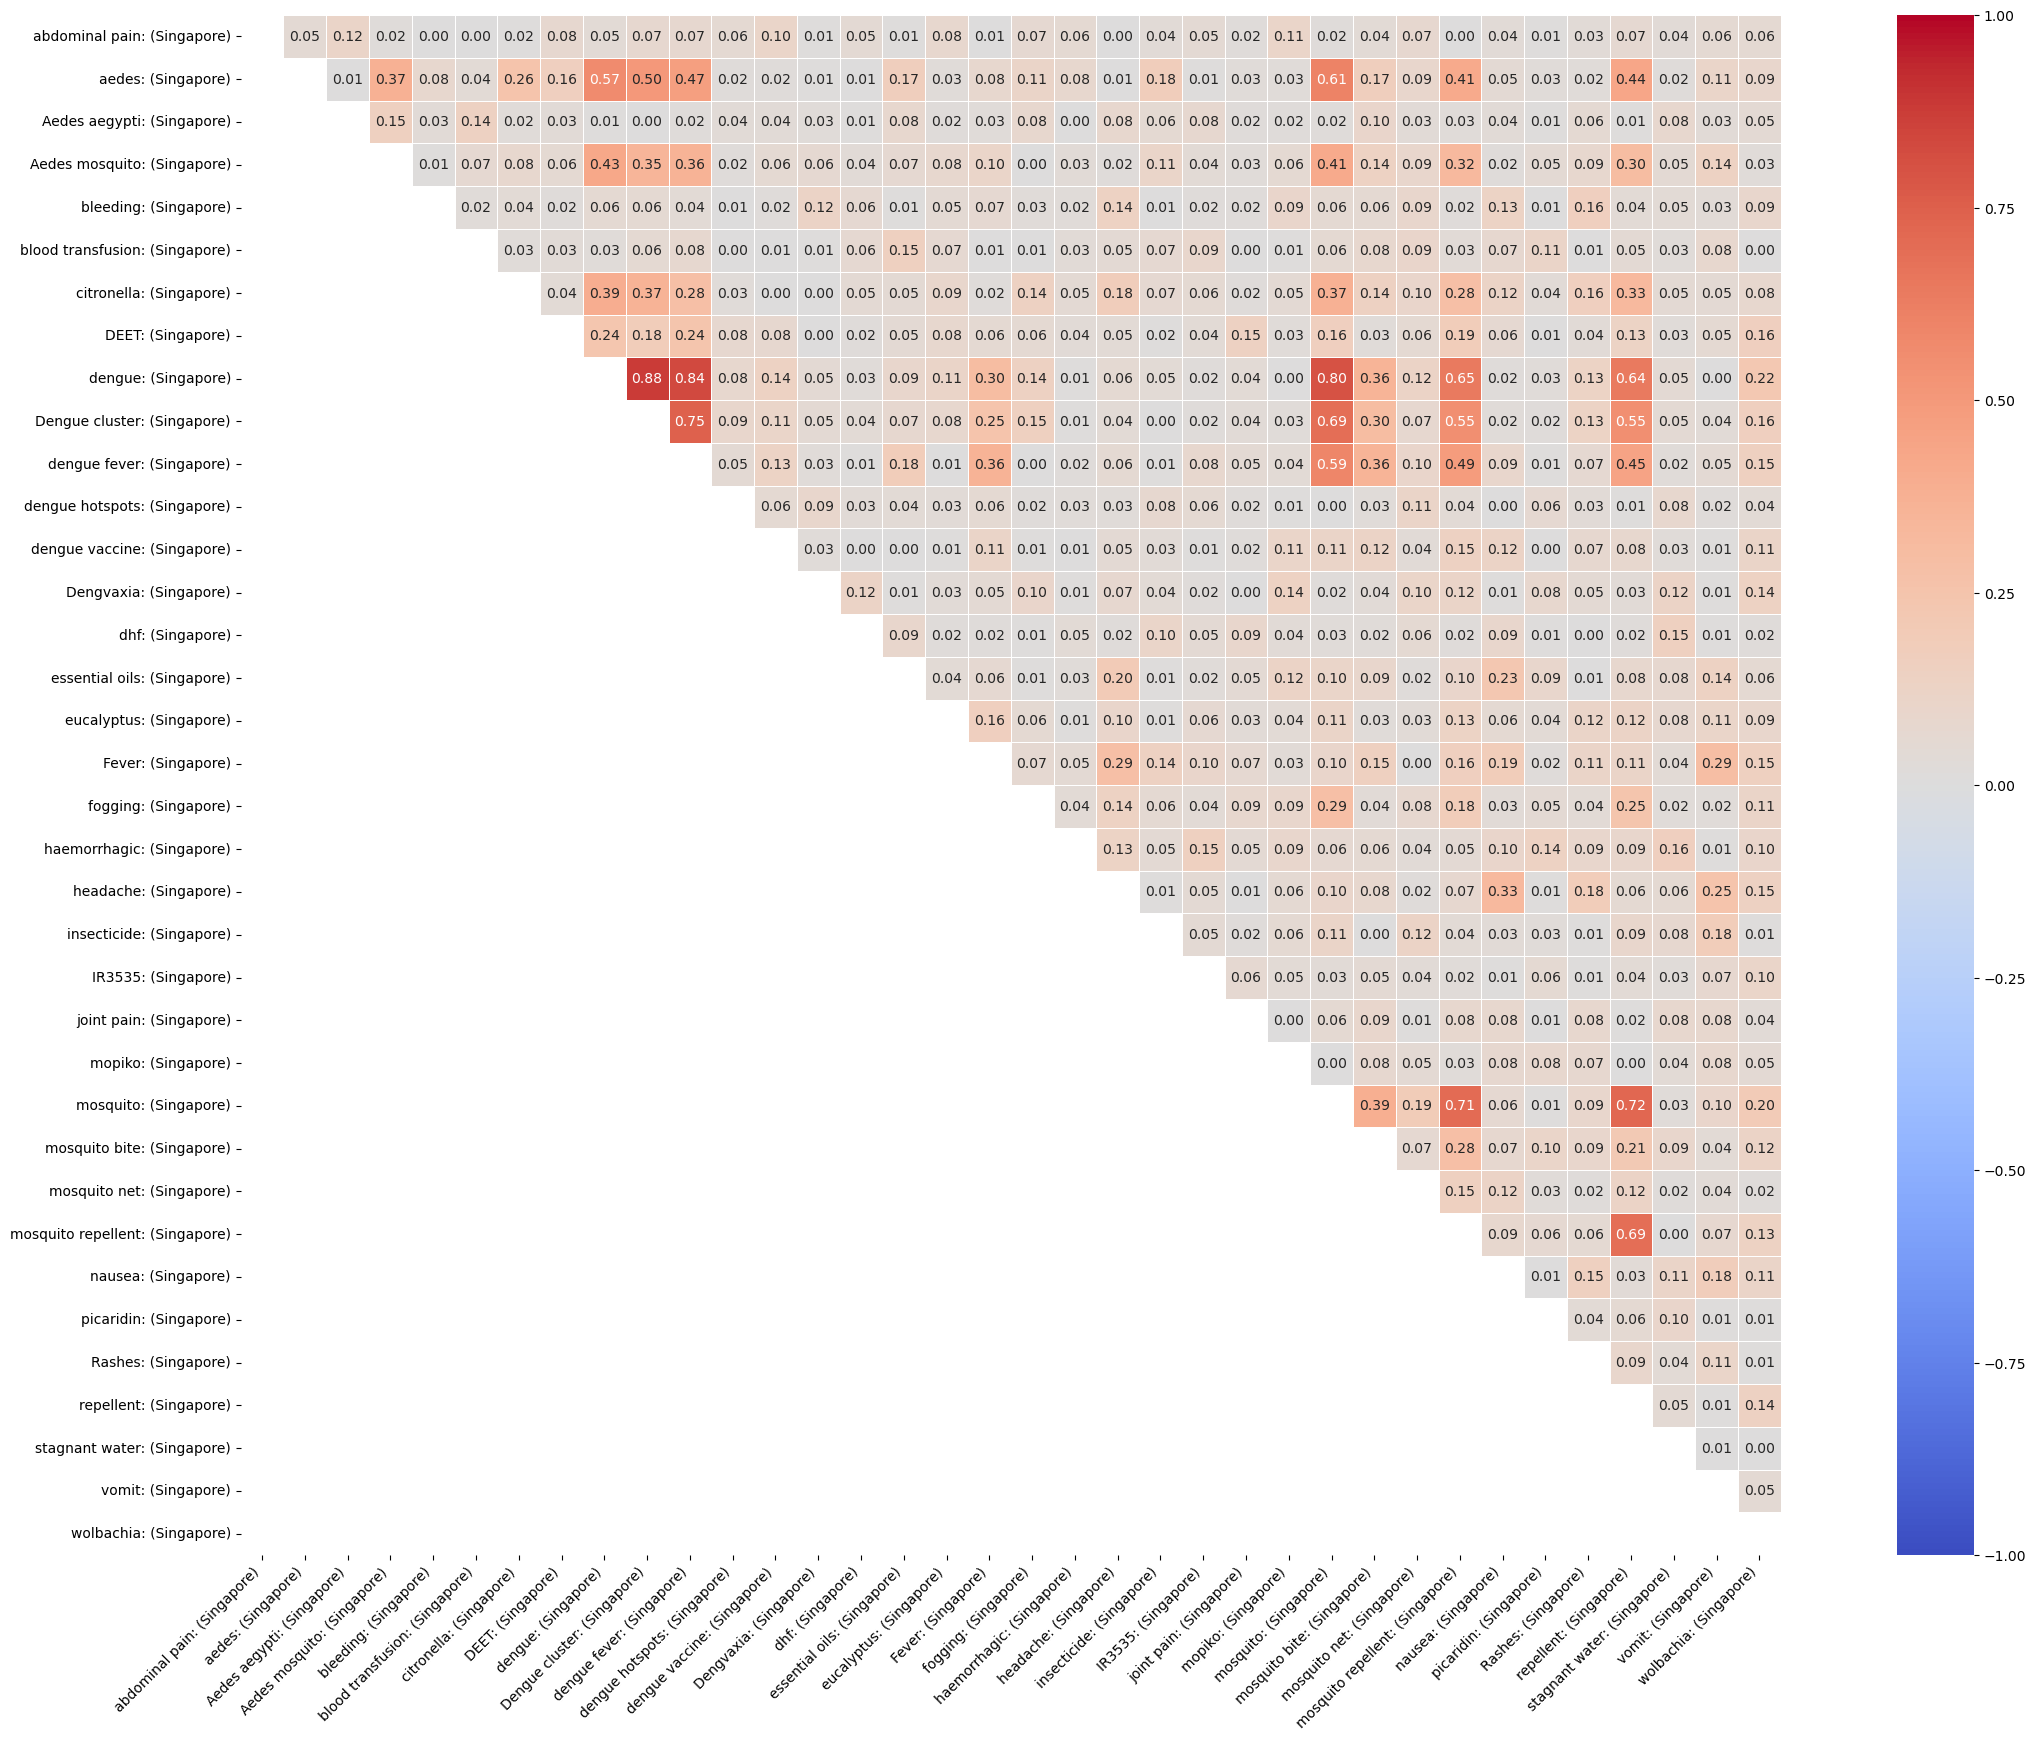

In [4]:
pyplot.figure(figsize = (30,20))
sns.heatmap(dataCorr,  square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap = "coolwarm",fmt='.2f')
pyplot.xticks(rotation=45, ha='right')

### 3. Selecting keywords that are highly correlated with each other. The threshold is 0.5.

In [5]:
dataCorr = dataCorr[abs(dataCorr) >= 0.5].stack().reset_index()
print (dataCorr)

                            level_0                          level_1         0
0                aedes: (Singapore)              dengue: (Singapore)  0.567831
1                aedes: (Singapore)      Dengue cluster: (Singapore)  0.502240
2                aedes: (Singapore)            mosquito: (Singapore)  0.605183
3               dengue: (Singapore)      Dengue cluster: (Singapore)  0.877742
4               dengue: (Singapore)        dengue fever: (Singapore)  0.835288
5               dengue: (Singapore)            mosquito: (Singapore)  0.801544
6               dengue: (Singapore)  mosquito repellent: (Singapore)  0.645571
7               dengue: (Singapore)           repellent: (Singapore)  0.643017
8       Dengue cluster: (Singapore)        dengue fever: (Singapore)  0.745105
9       Dengue cluster: (Singapore)            mosquito: (Singapore)  0.687726
10      Dengue cluster: (Singapore)  mosquito repellent: (Singapore)  0.550513
11      Dengue cluster: (Singapore)           repell

### 4. Get the unique list of keywords and prune the dataframe

In [6]:
columns= list(set(list(set(dataCorr.level_0))+list(set(dataCorr.level_1))))
columns

['repellent: (Singapore)',
 'mosquito repellent: (Singapore)',
 'mosquito: (Singapore)',
 'aedes: (Singapore)',
 'dengue fever: (Singapore)',
 'dengue: (Singapore)',
 'Dengue cluster: (Singapore)']

In [7]:
df2 = df[['Week']+columns]
df2.head(3)

,Week,repellent: (Singapore),mosquito repellent: (Singapore),mosquito: (Singapore),aedes: (Singapore),dengue fever: (Singapore),dengue: (Singapore),Dengue cluster: (Singapore)
0,2018-04-08,38,47,40,0,20,9,0
1,2018-04-15,17,0,32,59,0,5,0
2,2018-04-22,42,20,37,0,12,8,11


### 5. Plotting the trend of top 7 correlated keywords from 2018 to 2023 weekly


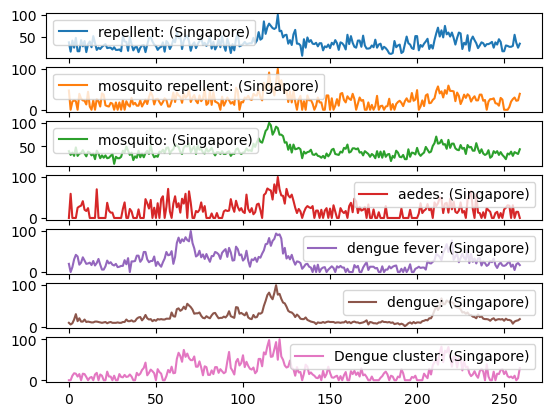

In [8]:
df2.plot(subplots=True, legend=True)
pyplot.show()

### 6. Conjugation of manually defined keywords

* Combining multiple terms via conjugation using Boolean logic overcomes sparsity in some time periods. Combining adds the results of each term, hence lower frequency term will not be filtered out.
* repellent + dengue fever + Dengue cluster + mosquito + mosquito repellent + dengue + aedes
* Source: https://medium.com/@pewresearch/using-google-trends-data-for-research-here-are-6-questions-to-ask-a7097f5fb526



In [9]:
ts = pd.read_csv('../datasets/dengue_data_cleaned.csv',index_col=False, parse_dates=['date']).sort_values(by=['date'], ascending=True)[['date','dengue_cases']]
ts.head()

,date,dengue_cases
221,2017-12-31,83
226,2018-01-07,68
227,2018-01-14,54
228,2018-01-21,45
229,2018-01-28,48


In [10]:
ts1 = pd.read_csv('../datasets/dengue_search_trends/defined_related_queries.csv', skiprows=2, parse_dates=['Week']).sort_values(by=['Week'], ascending=True)
ts1.head()

,Week,repellent + dengue fever + Dengue cluster + mosquito + mosquito repellent + dengue + aedes: (Singapore)
0,2018-04-08,20
1,2018-04-15,18
2,2018-04-22,21
3,2018-04-29,23
4,2018-05-06,39


### 7. Conjugation of the top 6 related queries according to google trends for "dengue" search term:

* Users searching for your term also searched for these queries.
* Top - The most popular search queries. Scoring is on a relative scale where a value of 100 is the most commonly searched query, 50 is a query searched half as often as the most popular query, and so on.


| Top Terms | Correlation |
|---|---|
|dengue fever|100|
|singapore dengue|100|
|dengue symptoms|97|
|fever|95|
|symptoms|93|
|dengue cluster|63|
|nea|29|

* We try to use conjugation for the aggregated google trends: <br> dengue + dengue fever + singapore dengue + dengue symptoms + fever + symptoms + dengue cluster

In [11]:
ts2 = pd.read_csv('../datasets/dengue_search_trends/google_related_queries.csv', skiprows=2, parse_dates=['Week']).sort_values(by=['Week'], ascending=True)
ts2.head()

,Week,dengue + dengue fever + singapore dengue + dengue symptoms + fever + symptoms + dengue cluster: (Singapore)
0,2018-04-08,26
1,2018-04-15,26
2,2018-04-22,28
3,2018-04-29,25
4,2018-05-06,29


### 8: Comparision of Google trends of manually defined keywords vs google top related queries against real dengue cases time series from 2018-2023

In [12]:
def compare_googletrends_denguecases(x1,y1,x2,y2):
    '''
    x1,y1: time series of dengue cases
    x2,y2: time series of google trends
    '''
    
    fig, ax1 = pyplot.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Dengue Cases', color=color) #First X-Axis label
    ax1.plot(x1, y1, color=color) #First time series
    ax1.tick_params(axis='y', labelcolor=color)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    
    color = 'tab:blue'
    ax2.set_ylabel('Google Trend', color=color) #Second X-axis label
    ax2.plot(x2, y2, color=color)  #Second time series
    ax2.tick_params(axis='y', labelcolor=color)
    
    fig.tight_layout()
    pyplot.show()


### The Google trend for the conjugated manually defined keywords matches the dengue cases timeseries!
* There is also no observable time lags, perhaps due to data aggregated weekly
* The google trend for the related queries of "dengue" by google does not match as well with the denge cases

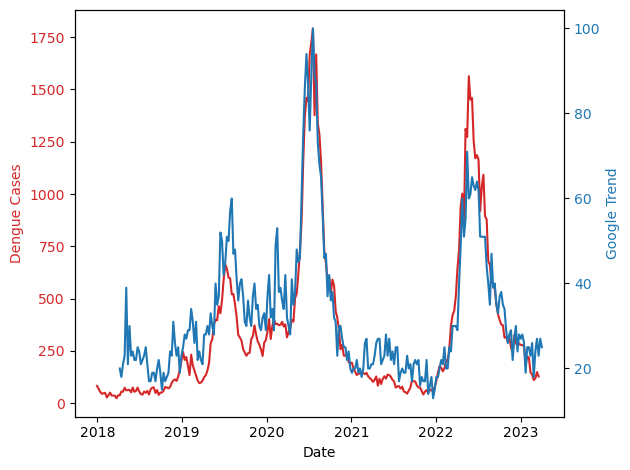

In [13]:
x1=ts['date']
y1=ts['dengue_cases']
x2=ts1['Week']
y2=ts1['repellent + dengue fever + Dengue cluster + mosquito + mosquito repellent + dengue + aedes: (Singapore)']

compare_googletrends_denguecases(x1,y1,x2,y2)

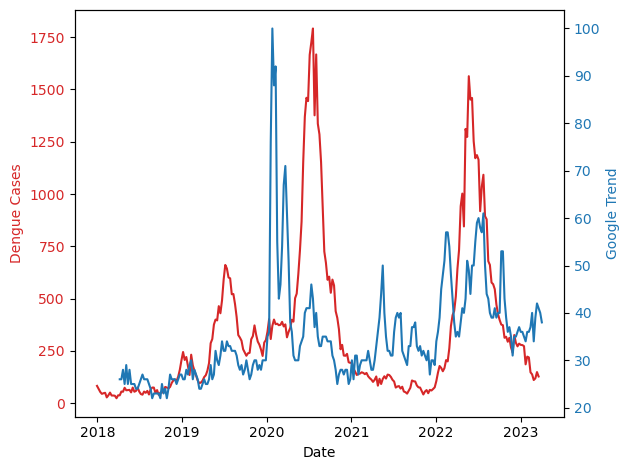

In [14]:
x1=ts['date']
y1=ts['dengue_cases']
x2=ts2['Week']
y2=ts2['dengue + dengue fever + singapore dengue + dengue symptoms + fever + symptoms + dengue cluster: (Singapore)']

compare_googletrends_denguecases(x1,y1,x2,y2)

### 9. Choosing the manually defined keywords for google trend data set

In [15]:
ts1.head()

,Week,repellent + dengue fever + Dengue cluster + mosquito + mosquito repellent + dengue + aedes: (Singapore)
0,2018-04-08,20
1,2018-04-15,18
2,2018-04-22,21
3,2018-04-29,23
4,2018-05-06,39


In [16]:
ts1.columns

Index(['Week', 'repellent + dengue fever + Dengue cluster + mosquito + mosquito repellent + dengue + aedes: (Singapore)'], dtype='object')

In [19]:
result = ts1.set_index('Week')
result.rename({'repellent + dengue fever + Dengue cluster + mosquito + mosquito repellent + dengue + aedes: (Singapore)': 'google_trends'}, axis=1,inplace=True)
result.head()

,google_trends
Week,
2018-04-08,20
2018-04-15,18
2018-04-22,21
2018-04-29,23
2018-05-06,39


In [22]:
result.to_csv('../datasets/dengue_google_trends_cleaned.csv', encoding='utf-8')